In [1]:
#import
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time
%matplotlib inline
investments = pd.read_csv('CGI.csv')
print(investments.keys())

Index(['Year', 'Month', 'Investor', ' Quantity in Millions ', 'Share Size',
       'Transaction Party', 'Sector', 'Subsector', 'Country', 'Region', 'BRI',
       'Greenfield'],
      dtype='object')


In [2]:
investments = investments.fillna(0)

In [3]:
#info
print(investments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1635 non-null   int64  
 1   Month                   1635 non-null   object 
 2   Investor                1635 non-null   object 
 3    Quantity in Millions   1635 non-null   object 
 4   Share Size              1635 non-null   object 
 5   Transaction Party       1635 non-null   object 
 6   Sector                  1635 non-null   object 
 7   Subsector               1635 non-null   object 
 8   Country                 1635 non-null   object 
 9   Region                  1635 non-null   object 
 10  BRI                     1635 non-null   float64
 11  Greenfield              1635 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 153.4+ KB
None


In [4]:
investments[' Quantity in Millions '] = investments[' Quantity in Millions '].str.replace("$","")
investments[' Quantity in Millions '] = investments[' Quantity in Millions '].str.replace(",","")
investments[' Quantity in Millions '] = investments[' Quantity in Millions '].astype('int64')

In [5]:
#China investments sum & mean in regions
investments_grouped = investments[' Quantity in Millions '].groupby(investments['Region'])
print(investments_grouped.mean())
print(investments_grouped.sum())

Region
Arab Middle East and North Africa     967.804878
Australia                             634.805195
East Asia                             571.353383
Europe                                884.177215
North America                         749.529412
South America                        1017.107438
Sub-Saharan Africa                    696.535433
USA                                   685.150376
West Asia                             604.666667
Name:  Quantity in Millions , dtype: float64
Region
Arab Middle East and North Africa     39680
Australia                             97760
East Asia                            151980
Europe                               349250
North America                         63710
South America                        123070
Sub-Saharan Africa                    88460
USA                                  182250
West Asia                            108840
Name:  Quantity in Millions , dtype: int64


In [6]:
#China investments sum & mean in regions that attended OBR
in_OBR_1 = investments[investments['BRI'] == 1.0].groupby(by = 'Region')[' Quantity in Millions ']
print(in_OBR_1.mean())
print(in_OBR_1.sum())

Region
Arab Middle East and North Africa     663.043478
East Asia                             632.201258
Europe                                619.210526
North America                         667.500000
South America                        1560.909091
Sub-Saharan Africa                    557.017544
West Asia                             598.607595
Name:  Quantity in Millions , dtype: float64
Region
Arab Middle East and North Africa     15250
East Asia                            100520
Europe                                47060
North America                          2670
South America                         34340
Sub-Saharan Africa                    31750
West Asia                             47290
Name:  Quantity in Millions , dtype: int64


In [7]:
#China investments sum & mean after OBR announced in regions that attended OBR
in_OBR_1_after = investments[(investments['Year']>2012) & (investments['BRI'] == 1.0)].groupby(by = 'Region')[' Quantity in Millions ']
print(in_OBR_1_after.mean())
print(in_OBR_1_after.sum())

Region
Arab Middle East and North Africa     663.043478
East Asia                             632.201258
Europe                                619.210526
North America                         667.500000
South America                        1560.909091
Sub-Saharan Africa                    557.017544
West Asia                             598.607595
Name:  Quantity in Millions , dtype: float64
Region
Arab Middle East and North Africa     15250
East Asia                            100520
Europe                                47060
North America                          2670
South America                         34340
Sub-Saharan Africa                    31750
West Asia                             47290
Name:  Quantity in Millions , dtype: int64


In [8]:
#China investments sum & mean before OBR announced in regions that attended OBR(NONE)
in_OBR_1_before = investments[(investments['Year']<2013) & (investments['BRI'] == 1.0)].groupby(by = 'Region')[' Quantity in Millions ']
print(in_OBR_1_before.mean())
print(in_OBR_1_before.sum())

Series([], Name:  Quantity in Millions , dtype: int64)
Series([], Name:  Quantity in Millions , dtype: int64)


In [9]:
#China investments sum & mean in regions that not attended OBR
in_OBR_0 = investments[investments['BRI'] == 0.0].groupby(by = 'Region')[' Quantity in Millions ']
print(in_OBR_0.mean())
print(in_OBR_0.sum())

Region
Arab Middle East and North Africa    1357.222222
Australia                             634.805195
East Asia                             480.934579
Europe                                947.304075
North America                         753.580247
South America                         896.262626
Sub-Saharan Africa                    810.142857
USA                                   685.150376
West Asia                             609.405941
Name:  Quantity in Millions , dtype: float64
Region
Arab Middle East and North Africa     24430
Australia                             97760
East Asia                             51460
Europe                               302190
North America                         61040
South America                         88730
Sub-Saharan Africa                    56710
USA                                  182250
West Asia                             61550
Name:  Quantity in Millions , dtype: int64


In [10]:
#China investments sum & mean after OBR announced in regions that not attended OBR
in_OBR_0_after = investments[(investments['Year']>2012) & (investments['BRI'] == 0.0)].groupby(by = 'Region')[' Quantity in Millions ']
print(in_OBR_0_after.mean())
print(in_OBR_0_after.sum())

Region
Arab Middle East and North Africa    1350.000000
Australia                             468.316832
East Asia                             423.437500
Europe                                953.902439
North America                         479.069767
South America                         752.692308
Sub-Saharan Africa                    881.111111
USA                                   668.125000
West Asia                             503.958333
Name:  Quantity in Millions , dtype: float64
Region
Arab Middle East and North Africa      4050
Australia                             47300
East Asia                             13550
Europe                               234660
North America                         20600
South America                         39140
Sub-Saharan Africa                    15860
USA                                  138970
West Asia                             24190
Name:  Quantity in Millions , dtype: int64


In [11]:
#China investments sum & mean before OBR announced in regions that not attended OBR
in_OBR_0_before = investments[(investments['Year']<2013) & (investments['BRI'] == 0.0)].groupby(by = 'Region')[' Quantity in Millions ']
print(in_OBR_0_before.mean())
print(in_OBR_0_before.sum())

Region
Arab Middle East and North Africa    1358.666667
Australia                             952.075472
East Asia                             505.466667
Europe                                925.068493
North America                        1064.210526
South America                        1055.106383
Sub-Saharan Africa                    785.576923
USA                                   746.206897
West Asia                             704.905660
Name:  Quantity in Millions , dtype: float64
Region
Arab Middle East and North Africa    20380
Australia                            50460
East Asia                            37910
Europe                               67530
North America                        40440
South America                        49590
Sub-Saharan Africa                   40850
USA                                  43280
West Asia                            37360
Name:  Quantity in Millions , dtype: int64


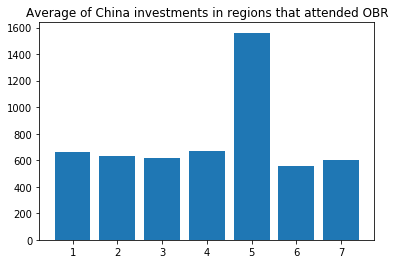

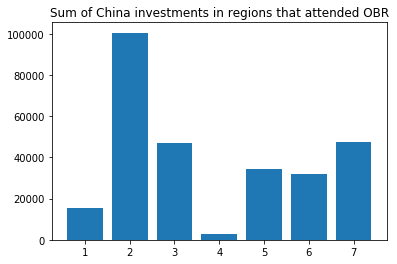

In [12]:
#region 1-Arab Middle East and North Africa,2-East Asia,3-Europe,4-North America
#region 5-South America,6-Sub-Saharan Africa,7-West Asia
x = np.arange(1,8)
plt.bar(x,in_OBR_1.mean())
plt.title('Average of China investments in regions that attended OBR')
plt.show()
x = np.arange(1,8)
plt.bar(x,in_OBR_1.sum())
plt.title('Sum of China investments in regions that attended OBR')
plt.show()

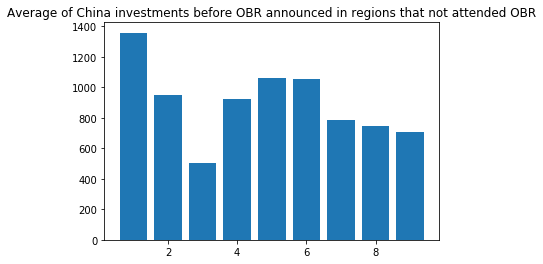

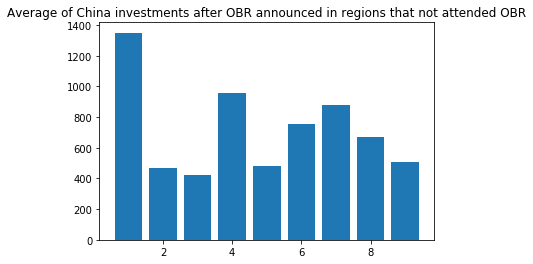

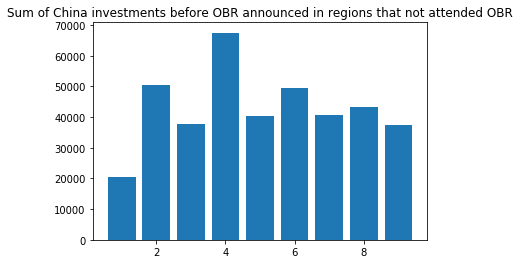

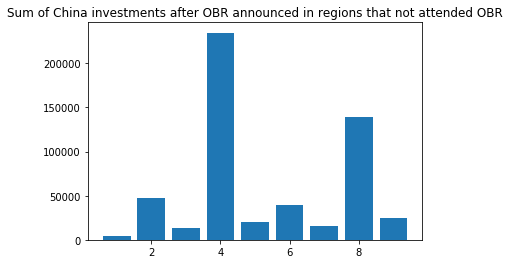

In [13]:
#region 1-Arab Middle East and North Africa,2-Australia,3-East Asia,4-Europe,5-North America
#region 6-South America,7-Sub-Saharan Africa,8-USA,9-West Asia
x = np.arange(1,10)
plt.bar(x,in_OBR_0_before.mean())
plt.title('Average of China investments before OBR announced in regions that not attended OBR')
plt.show()
x = np.arange(1,10)
plt.bar(x,in_OBR_0_after.mean())
plt.title('Average of China investments after OBR announced in regions that not attended OBR')
plt.show()
x = np.arange(1,10)
plt.bar(x,in_OBR_0_before.sum())
plt.title('Sum of China investments before OBR announced in regions that not attended OBR')
plt.show()
x = np.arange(1,10)
plt.bar(x,in_OBR_0_after.sum())
plt.title('Sum of China investments after OBR announced in regions that not attended OBR')
plt.show()

In [14]:
#China investments in USA sum & mean during trade-war
print(investments[(investments['Year'].between(2018,2019)) &  (investments['Region'] == 'USA')][' Quantity in Millions '].mean())
print(investments[(investments['Year'].between(2018,2019)) &  (investments['Region'] == 'USA')][' Quantity in Millions '].sum())

404.2857142857143
11320


In [15]:
#China investments in USA sum & mean two years before trade-war begin
print(investments[(investments['Year'].between(2016,2017)) &  (investments['Region'] == 'USA')][' Quantity in Millions '].mean())
print(investments[(investments['Year'].between(2016,2017)) &  (investments['Region'] == 'USA')][' Quantity in Millions '].sum())

857.4725274725274
78030


In [16]:
#China investments in every region / per year
for i in range(2005,2020): 
    locals()['investments_cat{}'.format(i)] = investments[investments['Year'] == i].groupby(by = 'Region')[' Quantity in Millions '].sum()
    print(locals()['investments_cat{}'.format(i)])
    if (i == 2005):
        investments_cat = locals()['investments_cat{}'.format(i)]
    else:
        investments_cat = np.append(investments_cat,locals()['investments_cat{}'.format(i)])

Region
Arab Middle East and North Africa     290
Australia                             320
East Asia                             870
Europe                                100
North America                         750
South America                        1970
USA                                  1740
West Asia                            4200
Name:  Quantity in Millions , dtype: int64
Region
Arab Middle East and North Africa     940
Australia                            2920
East Asia                            1600
Europe                               1380
North America                         110
South America                         430
Sub-Saharan Africa                   5550
West Asia                            7320
Name:  Quantity in Millions , dtype: int64
Region
Arab Middle East and North Africa    1350
Australia                             430
Europe                               6710
North America                         100
South America                        1430
Sub-Saharan

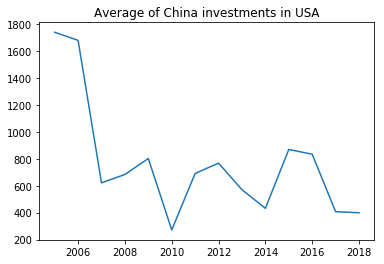

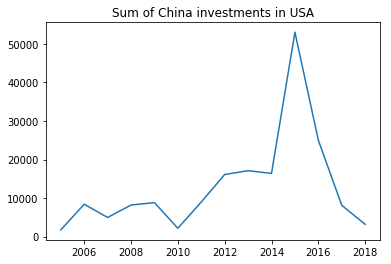

In [17]:
#China investments in USA
year = np.arange(2005,2019)
in_re_USA = investments[investments['Region'] == 'USA'].groupby(by = 'Year')[' Quantity in Millions ']
lines = plt.plot(year,in_re_USA.mean())
plt.title('Average of China investments in USA')
plt.show()
lines = plt.plot(year,in_re_USA.sum())
plt.title('Sum of China investments in USA')
plt.show()

k = 1 Training.
Score: 0.7142857142857143.
Complete time: 0.0064961910247802734 Secs.
k = 2 Training.
Score: 0.6428571428571429.
Complete time: 0.006980419158935547 Secs.
k = 3 Training.
Score: 0.5714285714285714.
Complete time: 0.006982326507568359 Secs.
k = 4 Training.
Score: 0.5.
Complete time: 0.005984067916870117 Secs.
k = 5 Training.
Score: 0.42857142857142855.
Complete time: 0.006981611251831055 Secs.
k = 6 Training.
Score: 0.35714285714285715.
Complete time: 0.005979776382446289 Secs.
k = 7 Training.
Score: 0.35714285714285715.
Complete time: 0.006986141204833984 Secs.


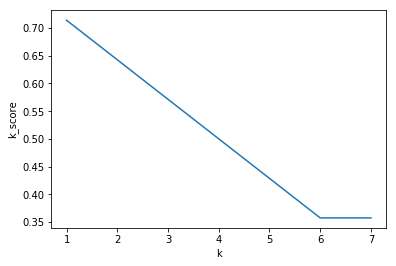

In [19]:
investments_data = investments[investments['Region'] == 'USA'][[' Quantity in Millions ','Year']]
investments_label = investments[investments['Region'] == 'USA'][' Quantity in Millions ']
train_data , test_data , train_label , test_label = train_test_split(investments_data,investments_label,test_size=0.05)
k_score = []
for k in range(1, 7 + 1):
    print("k = {} Training.".format(k))
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data,train_label)
    predict_result = knn.predict(test_data)
    predict_score = accuracy_score(test_label, predict_result)
    k_score.append(predict_score)
    end = time.time()
    print("Score: {}.".format(predict_score))
    print("Complete time: {} Secs.".format(end - start))
plt.plot(range(1, 7 + 1), k_score)
plt.xlabel('k')
plt.ylabel('k_score')
plt.show()

In [20]:
investments_data = investments[investments['Region'] == 'USA'][[' Quantity in Millions ','Year']]
investments_label = investments[investments['Region'] == 'USA'][' Quantity in Millions ']
train_data , test_data , train_label , test_label = train_test_split(investments_data,investments_label,test_size=0.05)
knn = KNeighborsClassifier(1)
knn.fit(train_data,train_label)
print(knn.predict(test_data))

[6000 1030  120 1210  150  130  130  160 2600  200  140 1500 2600  120]


In [21]:
test_label

1106    6500
875     1080
572      120
147     1200
1349     150
831      130
940      130
969      160
83      2510
314      200
931      140
402     1500
721     2580
998      120
Name:  Quantity in Millions , dtype: int64

In [22]:
investments_data = investments[investments['Region'] == 'USA'][[' Quantity in Millions ','Year']]
investments_label = investments[investments['Region'] == 'USA'][' Quantity in Millions ']
k = 1
print("k = {} Training.".format(k))
start = time.time()
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(investments_data,investments_label)
predict_result = knn.predict(investments_data)
end = time.time()
print(predict_result)
#print("Complete time: {} Secs.".format(end - start))

k = 1 Training.
[ 1740   100  3030   150   120  5000   160   260   100   200  1400   140
  2510   200   800  1300  1210   500   710   350  1200   100  1580   100
   150   200  1500   180   100  1150   440   130  2370  1230  1030   500
   190   140   160   400   200   270   230   200   570  2200   130   100
   120   200   420  2600   330  1500   500   500   120   260  1700  1020
   430   100  7100   680   750   110   290   140   350  1260   110   730
   100   220   180   340   100   120   290  2910  2140   200   670   100
   150   210   220   350   300   170   200   140   220   120   200   250
   460   110   130   200   480   190  1950  2580   900   600   600   160
   190   300   400   230   140   200   380   330   130   130  1900   320
   220  1840   500   730   800   100   230   130   440   390   900   210
   160   100   100   250  1080   270   240   150   140  1010   100   190
   180   130  1350  3500  5400   140   920   130   250  6000   100   160
   570   420   500   250   690  572

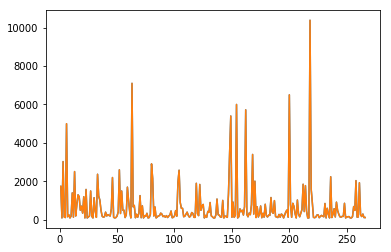

In [23]:
in_re_USA = investments[investments['Region'] == 'USA'][' Quantity in Millions ']
plt.plot(range(1, len(in_re_USA) + 1), in_re_USA,range(1, len(in_re_USA) + 1),predict_result)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [24]:
in_re_TW = investments[investments['Country'] == 'Taiwan'].groupby(by = 'Year')[' Quantity in Millions '].sum()
in_re_TW

Year
2012    140
2018    240
2019    840
Name:  Quantity in Millions , dtype: int64